<a href="https://colab.research.google.com/github/JuanAdanNvaBnda/Bases/blob/main/Algunos_ejemplos_de_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Antes de preocuparnos por hacer que nuestras redes neuronales sean profundas, será útil implementar algunas redes neuronales superficiales, para las cuales las entradas se conectan directamente a las salidas. Esto resultará importante por varias razones.

* En lugar de distraernos con arquitecturas complicadas, podemos centrarnos en los conceptos básicos del entrenamiento de redes neuronales, incluida la parametrización de la capa de salida, el manejo de datos, la especificación de una función de pérdida y el entrenamiento del modelo.
* Esta clase de redes superficiales comprende el conjunto de modelos lineales, que incluye muchos métodos clásicos para la predicción estadística, incluida la regresión lineal y softmax. Comprender estas herramientas clásicas es fundamental porque se usan ampliamente en muchos contextos y, a menudo, tendremos que usarlas como líneas de base al justificar el uso de arquitecturas más elegantes.

Los **problemas de regresión** aparecen cada vez que queremos predecir un valor numérico. Los ejemplos comunes incluyen predecir precios (de casas, acciones, etc.), predecir la duración de la estadía (para pacientes en el hospital), pronosticar la demanda (para ventas minoristas), entre muchos otros. No todos los problemas de predicción son un problema de regresión clásico. Más adelante, presentaremos problemas de clasificación, donde el objetivo es predecir la membresía entre un conjunto de categorías. Normalmente, usaremos *n* para denotar el número de ejemplos en nuestro conjunto de datos.

La regresión lineal puede ser la más simple y popular entre las herramientas estándar para abordar los problemas de regresión. Que se remonta a los albores del siglo 19, la regresión lineal fluye de unas pocas suposiciones simples. En primer lugar, asumimos que la relación entre las características y el objetivo es aproximadamente lineal, es decir, que la media condicional $E[Y|X=x]$ puede expresarse como una suma ponderada de las características. Esta configuración permite que el valor objetivo aún pueda desviarse de su valor esperado debido al ruido de observación. A continuación, podemos imponer la suposición de que cualquier ruido de este tipo se comporta bien, siguiendo una distribución gaussiana.

En general, para los modelos profundos no existen soluciones únicas para los parámetros, e incluso para los modelos lineales, la recuperación exacta de los parámetros solo es posible cuando ninguna característica depende linealmente de las demás. Sin embargo, en el aprendizaje automático, a menudo estamos menos preocupados por recuperar parámetros subyacentes verdaderos y más preocupados por parámetros que conducen a una predicción altamente precisa [Vapnik, 1992].

Afortunadamente, incluso en problemas de optimización difíciles, el descenso del gradiente estocástico a menudo puede encontrar soluciones notablemente buenas, debido en parte al hecho de que, para las redes profundas, existen muchas configuraciones de los parámetros que conducen a una predicción altamente precisa.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('ggplot')

In [ ]:
#from pathlib import  Path

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Ganancias en carreta de tacos

In [ ]:
%%writefile carretas.txt
% Carretas.txt: Gnancias de una food-truck según el tamaño de la ciudad.
%
% Los comentarios típicamente los ponemos con el indicador % para que
% el archivo también se pueda abrir en Matlab/octave, ya que en numpy uno puede
% definir el indicador para comentarios iniciales.
%
% Las variables son por columnas:
% 1.- Población de la ciudad (en 10,000s de personas)
% 2.- Beneficios anuales (en $10,000s de dolares)

6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166
5.7107,3.2522
14.164,15.505
5.734,3.1551
8.4084,7.2258
5.6407,0.71618
5.3794,3.5129
6.3654,5.3048
5.1301,0.56077
6.4296,3.6518
7.0708,5.3893
6.1891,3.1386
20.27,21.767
5.4901,4.263
6.3261,5.1875
5.5649,3.0825
18.945,22.638
12.828,13.501
10.957,7.0467
13.176,14.692
22.203,24.147
5.2524,-1.22
6.5894,5.9966
9.2482,12.134
5.8918,1.8495
8.2111,6.5426
7.9334,4.5623
8.0959,4.1164
5.6063,3.3928
12.836,10.117
6.3534,5.4974
5.4069,0.55657
6.8825,3.9115
11.708,5.3854
5.7737,2.4406
7.8247,6.7318
7.0931,1.0463
5.0702,5.1337
5.8014,1.844
11.7,8.0043
5.5416,1.0179
7.5402,6.7504
5.3077,1.8396
7.4239,4.2885
7.6031,4.9981
6.3328,1.4233
6.3589,-1.4211
6.2742,2.4756
5.6397,4.6042
9.3102,3.9624
9.4536,5.4141
8.8254,5.1694
5.1793,-0.74279
21.279,17.929
14.908,12.054
18.959,17.054
7.2182,4.8852
8.2951,5.7442
10.236,7.7754
5.4994,1.0173
20.341,20.992
10.136,6.6799
7.3345,4.0259
6.0062,1.2784
7.2259,3.3411
5.0269,-2.6807
6.5479,0.29678
7.5386,3.8845
5.0365,5.7014
10.274,6.7526
5.1077,2.0576
5.7292,0.47953
5.1884,0.20421
6.3557,0.67861
9.7687,7.5435
6.5159,5.3436
8.5172,4.2415
9.1802,6.7981
6.002,0.92695
5.5204,0.152
5.0594,2.8214
5.7077,1.8451
7.6366,4.2959
5.8707,7.2029
5.3054,1.9869
8.2934,0.14454
13.394,9.0551
5.4369,0.61705

Writing carretas.txt


In [ ]:
# Lee los datos en un nd array llamado datos
datos = np.loadtxt('/content/carretas.txt', comments='%', delimiter=',')

# Separa los datos de entrada de los de salida.
# si decimos que x = datos[:,0], pues se toma solo una columna de datos,
# por lo que x sería un ndarray de forma (shape) (96,). Al decir x = datos[:, 0:1]
# significa que vamos a tomar todas las columnas de 0 a una antes de 1, por lo
# que x tiene una forma (96, 1). Para mantener generalidad, es mejor manejar x como una matriz
# de una sola columna que como un vector de una dimensión.
x, y = datos[:,0:1], datos[:,1]

# T es el número de instancias y n el de atributos
T, n = x.shape

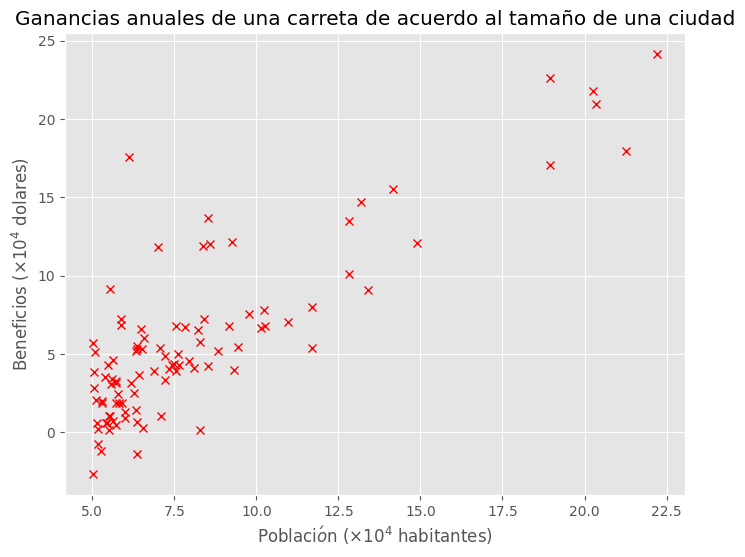

In [ ]:
plt.plot(x, y, 'rx')
plt.title(u'Ganancias anuales de una carreta de acuerdo al tamaño de una ciudad')
plt.xlabel(r"Poblaci$\'o$n ($\times 10^4$ habitantes)")
plt.ylabel(r'Beneficios ($\times 10^4$ dolares)')
plt.grid(True)
plt.show()

###Modelo

Perceptron: una capa con una neurona lineal

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras import initializers

In [ ]:
model = Sequential(name='perceptron')
model.add(Input(shape=(1,)))
model.add(Dense(1, activation='relu', name='output'))

opt = keras.optimizers.Adam(learning_rate= 0.0001)
model.compile(optimizer=opt,  loss='mean_squared_error'   )

In [ ]:
%time historial = model.fit(x, y,  epochs=1000, verbose=0)

CPU times: user 41.5 s, sys: 1.55 s, total: 43 s
Wall time: 56.7 s


In [ ]:
historial.history['loss'][-1:]

[64.14546203613281]

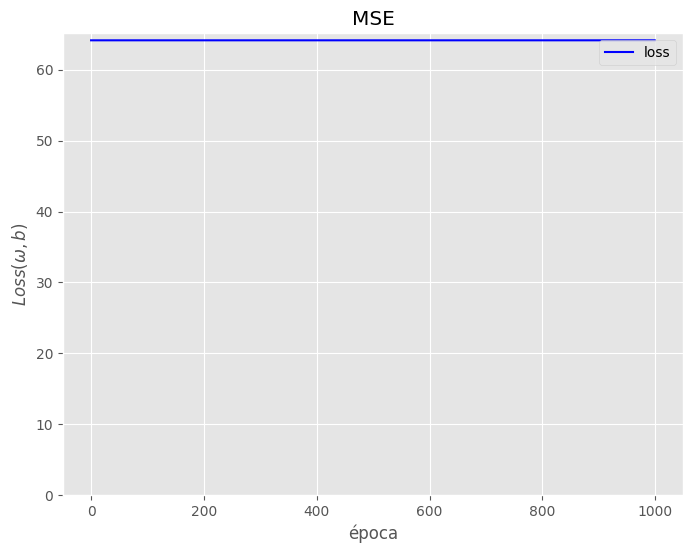

In [ ]:
plt.plot(historial.epoch, historial.history['loss'], 'b',label='loss')

plt.title(u'MSE')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.ylim([0, np.max(historial.history['loss'])+1])
plt.show()

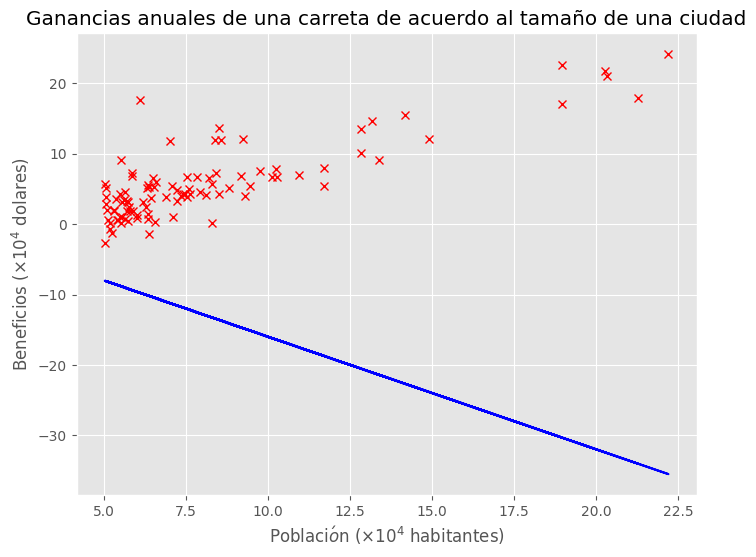

In [ ]:
plt.plot(x, y, 'rx')
plt.plot(x,  historial.model.get_weights()[0][0][0]*x +historial.model.get_weights()[1][0],'b' )
plt.title(u'Ganancias anuales de una carreta de acuerdo al tamaño de una ciudad')
plt.xlabel(r"Poblaci$\'o$n ($\times 10^4$ habitantes)")
plt.ylabel(r'Beneficios ($\times 10^4$ dolares)')
plt.show()



---



# Strenght concrete

In [ ]:
import keras
import time
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

### Los Datos

In [ ]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
concrete_data.shape

(1030, 9)

In [ ]:
concrete_data.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [ ]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [ ]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
target.head()

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [ ]:
target.summary()

#### X_train, X_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.10)

#### StandarScaler

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
dataset_estandarizado = scaler.fit(X_train)
X_train_estandarizado = scaler.transform(X_train)
X_train_estandarizado = pd.DataFrame(X_train_estandarizado, columns=X_train.columns)

X_test_estandarizado = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_estandarizado, columns=X_test.columns)  # <---- ESTANDARIZADO

In [ ]:
n_cols = X_train_estandarizado.shape[1] # number of predictors
n_cols

8

#### Conjunto de validación

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_estandarizado, y_train, test_size=0.10)  #<---- ESTANDARIZADO

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((834, 8), (93, 8), (103, 8))

### El modelo

#### modelo1

In [ ]:
model1 =Sequential( name="modelo1")
model1.add(Input(shape=(predictors.shape[1],)))
model1.add(Dense( 1, name = 'output', activation = 'linear' ))

model1.save("modelo1_generado.keras")

In [ ]:
import datetime

hora_actual = datetime.datetime.now()
print("Empieza la ejecución : ",hora_actual)

mejores_parametros = {
                          'evaluacion' : 500000,
                          'lr': None,
                          'epochs':None,
                          'batch_size': None,
                          'optimizador': None
                          }
t = time.time()
for lr in [0.0001, 0.001, 0.01, 0.1 ]:
    for epochs in [100,500, 1000]:
      for batch_size in [8,16, 32, 64, 128]:
        for opt in [keras.optimizers.Adam( learning_rate = lr ), keras.optimizers.SGD( learning_rate = lr ), keras.optimizers.SGD( learning_rate = lr, momentum = 0.9 ), keras.optimizers.Nadam( learning_rate = lr )]:
          print(f"                        lr={lr}, epochs={epochs}, batch_size={batch_size}, optimizador={opt}")
          mi_modelo = keras.models.load_model("modelo1_generado.keras")
          #opt = keras.optimizers.Adam( learning_rate = lr )

          mi_modelo.compile( optimizer = opt, loss = 'mean_squared_error')
          mi_historial = mi_modelo.fit( X_train, y_train, validation_data=(X_val,y_val), epochs = epochs, verbose = 0 , batch_size = batch_size)

          evaluacion = mi_modelo.evaluate(X_val, y_val, verbose=0)

          if ( evaluacion < mejores_parametros['evaluacion'] ):
              print(f"Evaluacion = {evaluacion},   lr={lr}, epochs={epochs}, batch_size={batch_size}, optimizador={opt}   <------")
              mejores_parametros['evaluacion'] = evaluacion
              mejores_parametros['lr'] = lr
              mejores_parametros['epochs'] = epochs
              mejores_parametros['batch_size'] = batch_size
              mejores_parametros['optimizador'] = opt

              mejor_modelo1 = mi_modelo.save("mejor_modelo1.keras")
              mejor_historial1 = mi_historial

print(f'\nTiempo de entrenamiento {(time.time() - t)/60:.5f} mins')

Evaluacion = 1586.97509765625,   lr=0.0001, epochs=100, batch_size=8, optimizador=<keras.src.optimizers.adam.Adam object at 0x79f325e9f040>   <------
Evaluacion = 149.81285095214844,   lr=0.0001, epochs=100, batch_size=8, optimizador=<keras.src.optimizers.sgd.SGD object at 0x79f325e9df90>   <------
Evaluacion = 110.93544006347656,   lr=0.0001, epochs=100, batch_size=8, optimizador=<keras.src.optimizers.sgd.SGD object at 0x79f325e9f370>   <------
Evaluacion = 109.90029907226562,   lr=0.0001, epochs=500, batch_size=8, optimizador=<keras.src.optimizers.sgd.SGD object at 0x79f323071f00>   <------
Evaluacion = 109.63761901855469,   lr=0.0001, epochs=500, batch_size=16, optimizador=<keras.src.optimizers.sgd.SGD object at 0x79f3230263e0>   <------
Evaluacion = 108.96575927734375,   lr=0.001, epochs=100, batch_size=8, optimizador=<keras.src.optimizers.sgd.SGD object at 0x79f32166f2b0>   <------
Evaluacion = 108.77340698242188,   lr=0.001, epochs=500, batch_size=64, optimizador=<keras.src.optim

KeyboardInterrupt: 

In [ ]:
print(mejores_parametros)

{'evaluacion': 108.26866912841797, 'lr': 0.01, 'epochs': 500, 'batch_size': 64, 'optimizador': <keras.src.optimizers.sgd.SGD object at 0x79f31c60e1d0>}


In [ ]:
mejor_modelo_1 = keras.models.load_model("mejor_modelo1.keras")
opt = mejores_parametros['optimizador']
mejor_modelo_1.compile( optimizer = opt, loss = 'mean_squared_error')

In [ ]:
print(mejor_modelo_1.evaluate(X_train,y_train), mejor_modelo_1.evaluate(X_val,y_val),  mejor_modelo_1.evaluate(X_test,y_test))


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111.6850 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 97.1954 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44502780.0000 
109.96624755859375 108.26866912841797 43635952.0


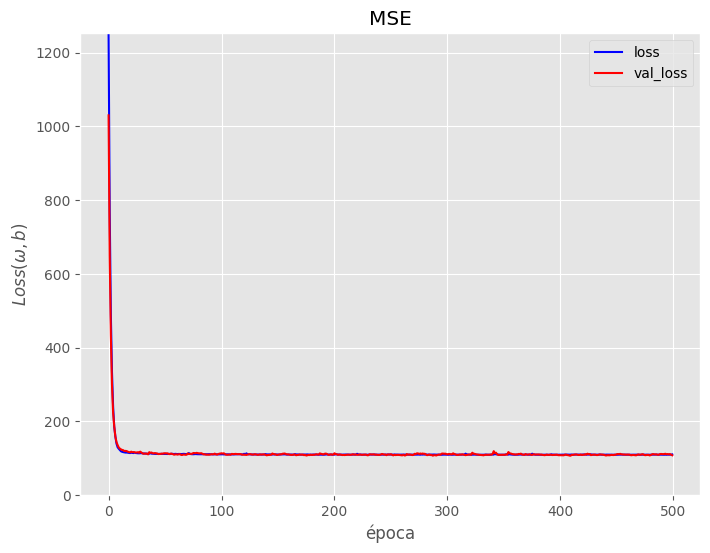

In [ ]:
plt.plot( mejor_historia1l.epoch, mejor_historial1.history['loss'],     'b',label='loss')
plt.plot( mejor_historial1.epoch, mejor_historial1.history['val_loss'], 'r',label='val_loss')

plt.title(u'MSE')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim([0, np.max(mejor_historial.history['loss'])])
plt.show()

#### modelo2

In [ ]:
model2 =Sequential( name="my_first_NN")
model2.add(Input(shape=(predictors.shape[1],)))
model2.add( Dense( 20, name = 'layer1', activation = 'relu'))
model2.add(Dense( 1, name = 'output', activation = 'relu' ))
model2.save("modelo2_generado.keras")

In [ ]:
import datetime

hora_actual = datetime.datetime.now()
print("Empieza la ejecución : ",hora_actual)
t = time.time()
mejores_parametros2 = {
                          'evaluacion' : 500000,
                          'lr': None,
                          'epochs':None,
                          'batch_size': None,
                          'optimizador': None
                          }
for lr in [0.0001, 0.001 ]:
    for epochs in [100]:
      for batch_size in [8,16]:
        for opt in [keras.optimizers.Adam( learning_rate = lr )]:
          print(f"                     lr={lr}, epochs={epochs}, batch_size={batch_size}, optimizador={opt}")
          mi_modelo = keras.models.load_model("modelo2_generado.keras")

          #mi_modelo.compile( optimizer = opt, loss = 'mean_squared_error')

          mi_modelo.compile( optimizer = opt, loss = 'mean_squared_error')
          mi_historial = mi_modelo.fit( X_train, y_train, validation_data=(X_val,y_val), epochs = epochs, verbose = 0 , batch_size = batch_size)

          evaluacion = mi_modelo.evaluate(X_val, y_val, verbose=0)

          if ( evaluacion < mejores_parametros2['evaluacion'] ):
              print(f"Evaluacion = {evaluacion},   lr={lr}, epochs={epochs}, batch_size={batch_size}, optimizador={opt}   <------")
              mejores_parametros2['evaluacion'] = evaluacion
              mejores_parametros2['lr'] = lr
              mejores_parametros2['epochs'] = epochs
              mejores_parametros2['batch_size'] = batch_size
              mejores_parametros2['optimizador'] = opt

              mejor_modelo2 = mi_modelo.save("mejor_modelo2.keras")
              mejor_historial2 = mi_historial

print(f'Tiempo de entrenamiento {(time.time() - t)/60:.5f} mins')
print("")
hora_actual = datetime.datetime.now()
print("Termina la ejecución : ",hora_actual)

Empieza la ejecución :  2024-08-21 21:58:09.466030
                     lr=0.0001, epochs=100, batch_size=8, optimizador=<keras.src.optimizers.adam.Adam object at 0x79f2f60d9f00>
Evaluacion = 378.900634765625,   lr=0.0001, epochs=100, batch_size=8, optimizador=<keras.src.optimizers.adam.Adam object at 0x79f2f60d9f00>   <------
                     lr=0.0001, epochs=100, batch_size=16, optimizador=<keras.src.optimizers.adam.Adam object at 0x79f2f60dba00>
                     lr=0.001, epochs=100, batch_size=8, optimizador=<keras.src.optimizers.adam.Adam object at 0x79f2f6135c00>
Evaluacion = 50.1865119934082,   lr=0.001, epochs=100, batch_size=8, optimizador=<keras.src.optimizers.adam.Adam object at 0x79f2f6135c00>   <------
                     lr=0.001, epochs=100, batch_size=16, optimizador=<keras.src.optimizers.adam.Adam object at 0x79f2f600f3d0>
Tiempo de entrenamiento 1.81530 mins

Termina la ejecución :  2024-08-21 21:59:58.389145


In [ ]:
mejores_parametros2

{'evaluacion': 50.1865119934082,
 'lr': 0.001,
 'epochs': 100,
 'batch_size': 8,
 'optimizador': <keras.src.optimizers.adam.Adam at 0x79f2f6135c00>}

In [ ]:
mejor_modelo_2 = keras.models.load_model("mejor_modelo2.keras")
opt = mejores_parametros2['optimizador']
mejor_modelo_2.compile( optimizer = opt, loss = 'mean_squared_error')

In [ ]:
print(mejor_modelo_2.evaluate(X_train,y_train), mejor_modelo_2.evaluate(X_val,y_val),  mejor_modelo_2.evaluate(X_test,y_test))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.0941
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 53.6771
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.6589 
43.7867546081543 50.1865119934082 55.723628997802734


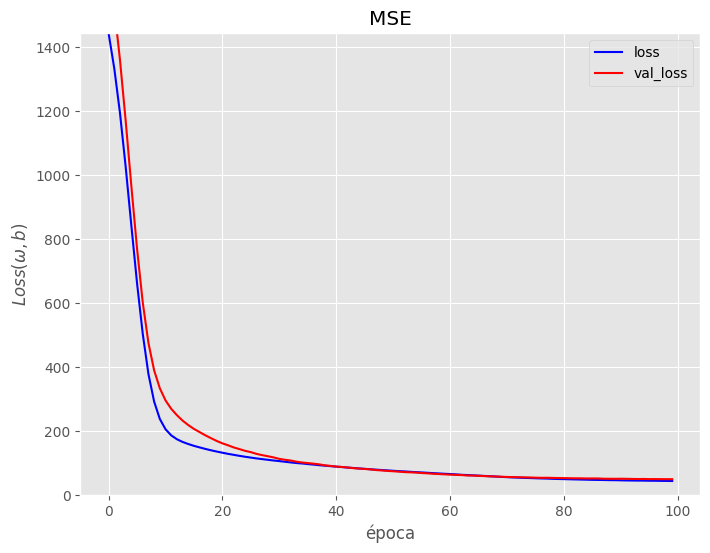

In [ ]:
plt.plot( mejor_historial2.epoch, mejor_historial2.history['loss'],     'b',label='loss')
plt.plot( mejor_historial2.epoch, mejor_historial2.history['val_loss'], 'r',label='val_loss')

plt.title(u'MSE')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim([0, np.max(mejor_historial2.history['loss'])])
plt.show()

In [ ]:
prediccion = mejor_modelo_2.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
prediccion[:5]

array([[38.661827],
       [72.56035 ],
       [23.18595 ],
       [22.999939],
       [44.095745]], dtype=float32)

In [ ]:
y_test[:5]

,Strength
492,45.90
152,77.30
637,26.06
295,23.51
91,35.30


# EJERCICIO

## Dataset Melbourn

In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays

In [2]:
# TODO: -----> Montar el drive de Google para acceder al archivo del dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#  DESCARGAR ARCHIVO https://drive.google.com/file/d/1uYjLwR_uJWeC-Nm6kYROhGDxCFOCPBae/view?usp=sharing
df = pd.read_csv('/content/drive/MyDrive/RedesNeuronales_cuenta1/Datasets/melb_data.csv',header=0)

In [5]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Hay 13,580 registros, 21 columnas
Columnas con datos categoricos
Columnas con valores faltantes: BuildingArea, YearBuilt, CouncilArea


Landsize, Rooms, Bathroom, Car




In [6]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


<Axes: >

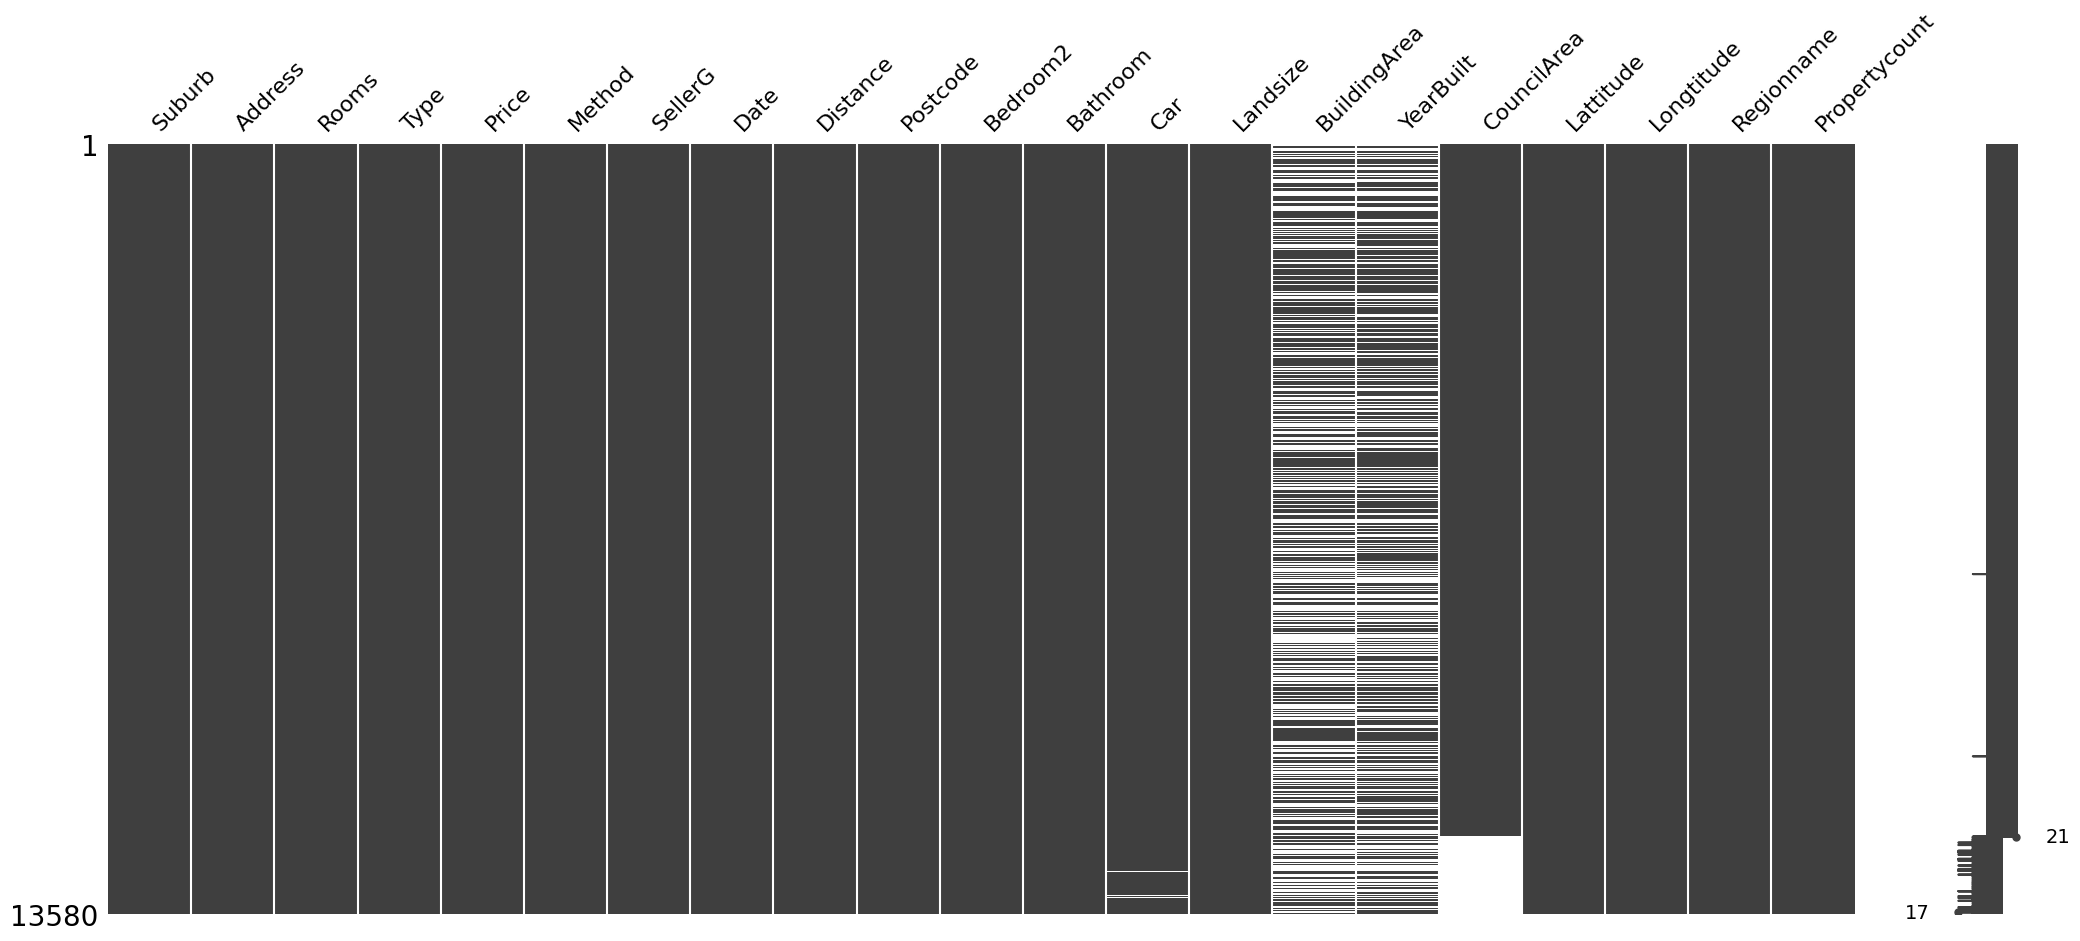

In [7]:
import missingno as msno
msno.matrix(df)

In [8]:
df_clean = df.drop(['BuildingArea','YearBuilt','CouncilArea'], axis = 1 ) #Eliminar columnas con muchos datos faltantes

In [9]:
df_filter = df[['Rooms','Price','Distance','Postcode','Bedroom2','Bathroom','Car']].copy()
df_filter

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0


In [10]:
df_filter_imp = df_filter.interpolate(methods='mean',axis=1) # imputando los valores faltantes en 'Car'

Predecir el precio ...

In [11]:
# Separar las características (X) y la variable objetivo (y)
X = df_filter_imp.drop('Price', axis=1)
y = df_filter_imp['Price']


In [12]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
from sklearn.metrics import mean_absolute_error

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae}")


Error Absoluto Medio (MAE): 319288.2078270667
